<center><br><font size=10>HW4</font><br>
<font size=6>SVM & Decision Trees</font>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Ilan Vasilevsky - ilanv@mail.tau.ac.il
<br><i>Spring 2023</i></center>

The answered notebook should be submitted in the following format: HW4_{id}.ipynb

**Important** - Use relative paths only! <br>
for example - "data_part1.csv" <br>
and **NOT** "C:\Users\Ilan\Desktop\HW4\data_part1.csv"

## Import libraries
You are allowed to use these libraries only. Other libraries from sklearn are not allowed without permission! However, feel free to ask for permission from course staff.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import auc, roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve
from IPython.display import Image
import os
import time

# Utility functions
functions that may assist you during this exercise. feel free to use them where you find them neccessary.

In [26]:
def plot_svm_decision_boundary(clf,margins=False,support_vectors=False) -> None:
    """
    Plots Decision boundries for trained svm classifier -> after calling this function use plt.show()
    clf: sklearn svm object after training (clf.fit())
    margins: boolean parameter to display the margins (False by default)
    support_vectors: boolean parameter to display the support vectors (False by default)
    """
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)


    if margins:
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k',levels=[-1,0,1], alpha=0.5,
                linestyles=['--', '-', '--'])
        
    else:
        # plot decision boundary without margins
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                linestyles=['-'])
        
        # plot decision boundary without margins
        ax.contour(XX, YY, Z, colors='k',levels=1, alpha=0.5,
                linestyles=['-'])

    # plot support vectors
    if support_vectors:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
        
        
def load_housing_data() -> tuple([pd.DataFrame,pd.Series]):
    assert os.path.exists('data_part2.csv'), "data.csv file must be in the same folder as the notebook!"
    housing_prices = pd.read_csv('data_part2.csv')
    y = housing_prices.price > housing_prices.price.mean()
    X = housing_prices.drop(columns=['price', 'date', 'id'])
    return X, y

# Part 1: SVM

#### Reading data

In [27]:
df = pd.read_csv('data_part1.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

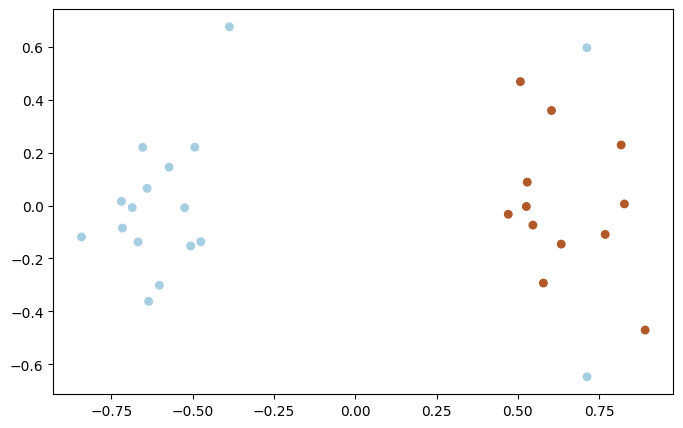

In [28]:
#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=29, cmap=plt.cm.Paired)
plt.show()

## a. Linear SVM
Use Linear SVM (SVM with linear kernel) and penalty C=10.  Plot the decision boundary and the margin. <br>
Answer the following question and explain your answer:<br>
How many support vectors do we get in this case?

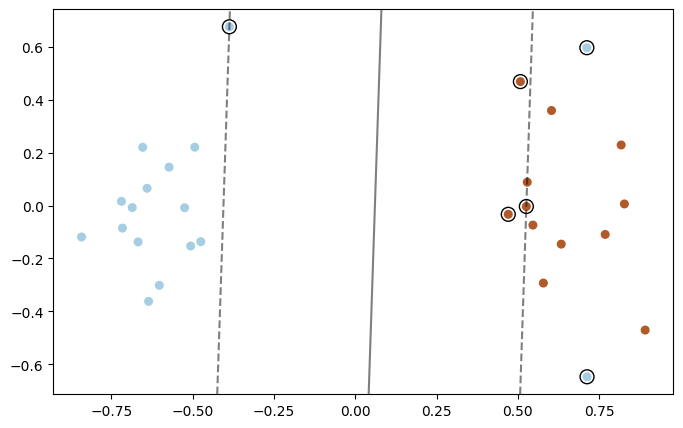

In [29]:
# fit the model
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X, y)

#for plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plot_svm_decision_boundary(clf,True,True)
plt.show()



Question: How many support vectors do we get in this case? <br>
TODO Your Answer: There are 6 support vectors.
- 2 on margin
- 2 inside margin (red)
- 2 misclassified blues.

As we can see has another point on the margin that didn't sign in the algorithem and it's because not all points on the margin line are necessarily support vectors. The support vectors are the critical points that directly influence the decision boundary, while other points on the margin may not have a significant impact.

## b. Penalty analysis for rbf kernel

Use SVM with RBF kernel. The slack penalty 𝐶 will determine the location of the separating hyperplane.<br>
    1. Where would the decision boundary be for very small values of 𝐶 (i.e.,𝐶 ≈ 0)? Plot the decision boundary. Justify your answer with words!<br>
    2. Where would the decision boundary be for very large values of 𝐶 (i.e., 𝐶 → ∞)? Plot the decision boundary. Justify your answer with words!<br>

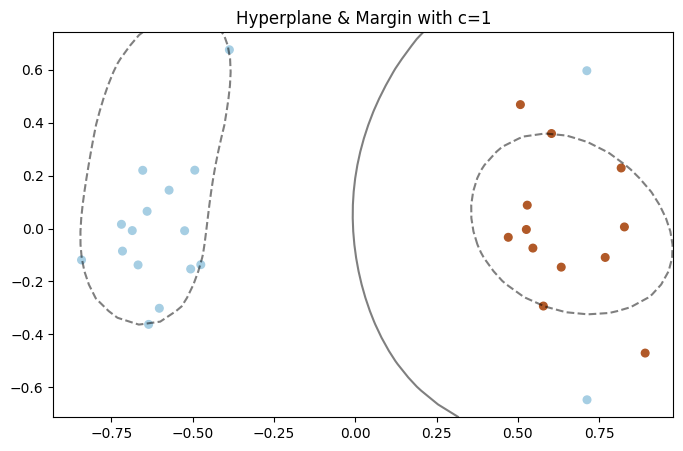

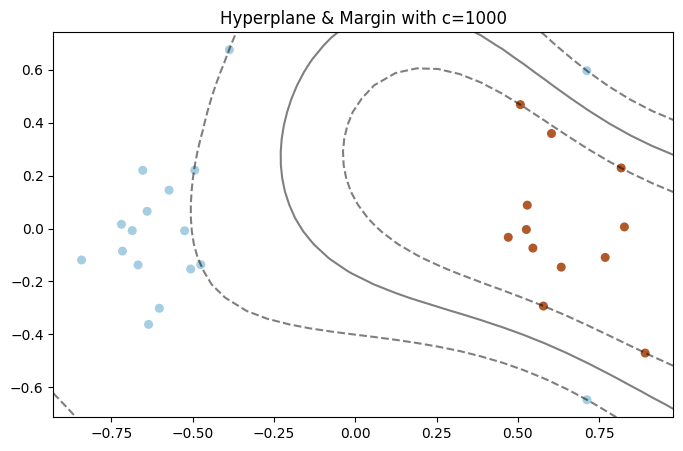

In [30]:
# Use this C list to answer questions above
Cs=[1,1000]
for c in Cs:
    # fit the model
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X, y)

    #for plotting
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plot_svm_decision_boundary(clf,True,False)
    plt.title("Hyperplane & Margin with c=%s"%c)
    plt.show()

TODO Answer with words below:

For very small values of C the decision boundary would be more flexible and likely to have a larger margin. With a small C, the model allows more misclassifications and focuses on maximizing the margin between the classes. This means that the decision boundary would be less influenced by individual data points and more influenced by the overall distribution of the data. (We can see 2 misclassified blues).

For very large values of C the decision boundary would become more influenced by individual data points and strive to correctly classify as many training samples as possible, potentially resulting in overfitting. With a large C, the model penalizes misclassifications heavily and focuses on fitting the training data perfectly.

## c. Choosing kernel hyperparameter for SVM

#### Creating data

In [31]:
# we generate 1000 samples with 2 features
X,y = datasets.make_circles(n_samples=1000, factor=.5, noise=.15, random_state=6)

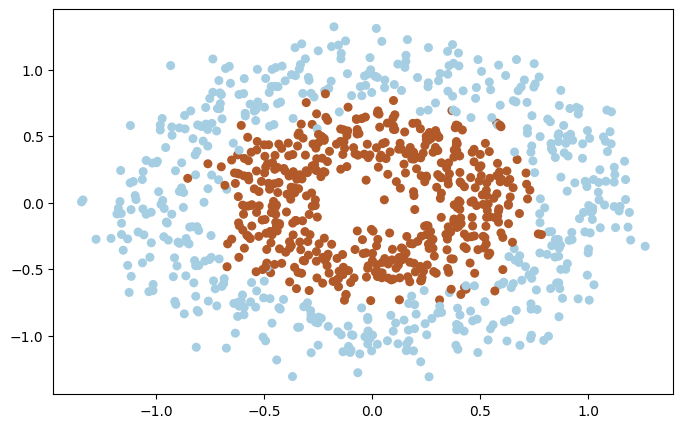

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

#### spliting data into train & Validation

In [33]:
X_train, X_Validation, y_train, y_Validation = train_test_split(X, y, test_size=0.25,random_state = 42,shuffle = True)

### Your mission:
For each k value in kernels:
1. Run SVM with k kernel on the train data (with C=1)

2. Plot all the hyperplane & X values on the graph - train and validation. (Use utility functions the plot). **Plot train and validation points in the same graph**.

3. Use the validation data to calculate the Accuracy for each kernel.

4. add a title that contains the kernel and the accuracy in the following format:<br>
"Hyperplane with kernel=linear and Acc=0.65" (the kernel and numbers are just for example).

In addition print: What is the optimal kernel for this dataset?

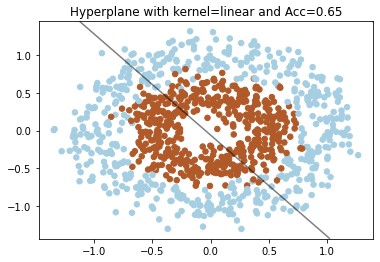

In [34]:
# Example plot
Image(filename='example_for_part1c.jpg') 

In [35]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

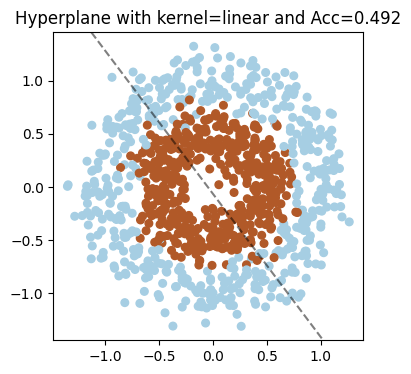

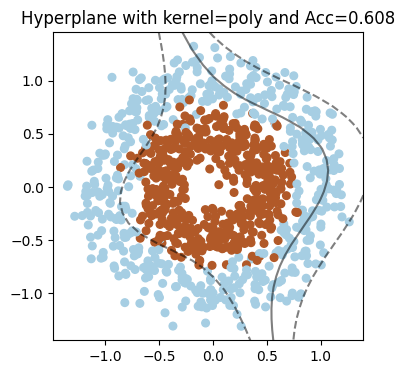

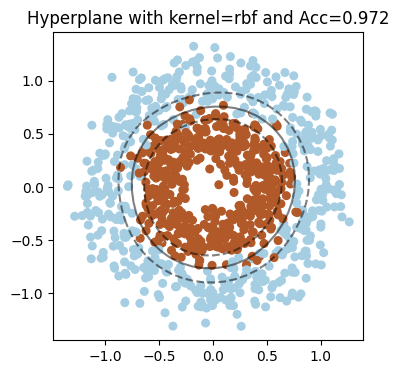

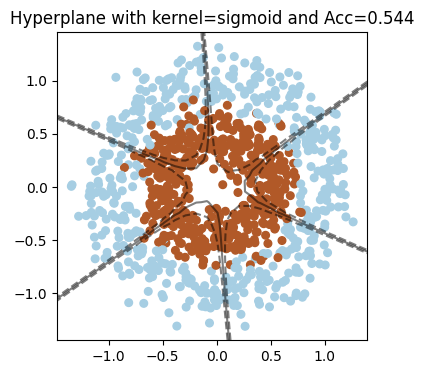

The optimal kernel is:  rbf


In [36]:
k_score = []    
for k in kernels:    
    # fit the model
    clf = svm.SVC(kernel=k, C=1)
    clf.fit(X_train, y_train)
    acc = clf.score(X_Validation, y_Validation)
    k_score.append(acc)
    
    # For plotting
    plt.figure(figsize=(4, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plot_svm_decision_boundary(clf,True,False)
    plt.title(f"Hyperplane with kernel={k} and Acc={acc}")
    plt.show()
    
chosen_k = kernels[k_score.index(max(k_score))]
print("The optimal kernel is: ", chosen_k)
# you may encounter a warning, you can ignore it

# Part 2: Decision Trees

## a. Decision tree loss function: <br>
Consider the Gini index, classification error, and entropy in a simple binary classification setting. <br>
Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$ <br> which is the probability of class 1 in a tree node $m$ (if there is 1 `1` and 9 `0` then it is $\hat{p}_{m1}=0.1$). <br>
For `entropy`, use 0.5*entropy, instead of regular entropy formula. <br>
Hint: the output should look like the one from the lecture

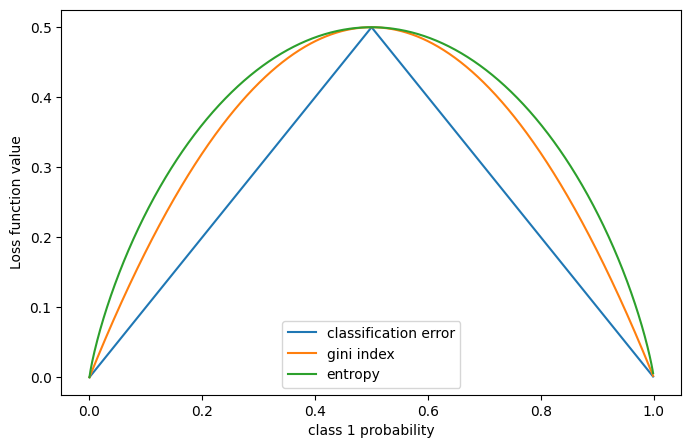

In [47]:
p = np.arange(0, 1, 0.001)  # probabilities

# for classification, calssify by the maximum probability
classification_error = 1-np.maximum(p, 1-p)

# unnormalized gini index
gini_index = 2*p*(1-p)

# use only non zero values (p[1:]) to avoid an error for log(0)
# set the entropy for p=0 to 0
entropy = 0.5*np.concatenate([[0.], -(p[1:]*np.log2(p[1:])+(1-p[1:])*np.log2(1-p[1:]))])

# plot
plt.plot(p, classification_error, label='classification error')
plt.plot(p, gini_index, label='gini index')
plt.plot(p, entropy, label='entropy')
plt.legend()
plt.xlabel('class 1 probability')
plt.ylabel('Loss function value')
plt.show()

## b. The Bias-Variance Tradeoff for Decision Tree Regressor
Demonstrate the bias variance tradeoff using hyperparameter selection in a Decision Tree Regressor, for the diabetes dataset.

### Instructions: 
- select one hyper-parameter to change that influences the bias variance tradeoff in Decision Tree, while setting all other parameters constant as you wish. for more information about Decision Tree Regressor parameters [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- **plot** train and validation mse according to your chosen parameter.
- explain why this demonstrates the bias variance tradeoff and how can we see it in your results.
- explain what do you think is the best value for this parameter in this experiment and why.
- max Runtime: 2 minutes
- use random_state=0 in the DecisionTreeRegressor constructor for reproducability.

In [48]:
diabetes_X_df, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X_dia_train, X_dia_val, y_dia_train, y_dia_val = train_test_split(diabetes_X_df, diabetes_y, test_size = 0.2, random_state = 42)

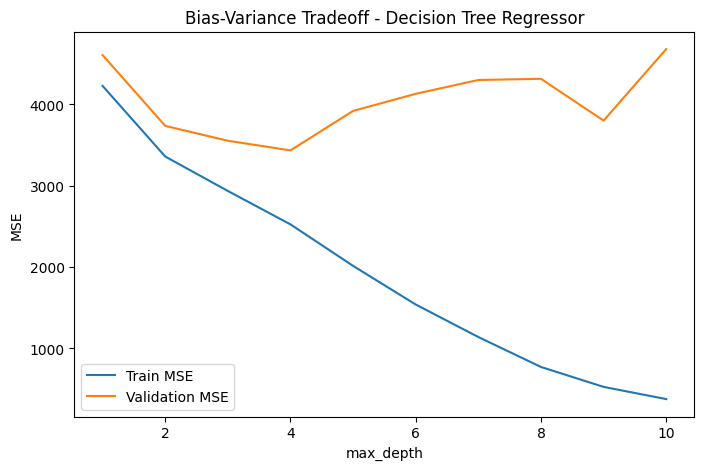

Runtime: 0.33 seconds


In [49]:
t0 = time.time() # for Runtime measurement

# I choose the max depth of the tree as Hyperparameter that changes, values to test:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_mse = []
val_mse = []

for max_depth in max_depth_values:
    # Create and fit the Decision Tree Regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    regressor.fit(X_dia_train, y_dia_train)

    # Predict on training and validation sets
    y_train_pred = regressor.predict(X_dia_train)
    y_val_pred = regressor.predict(X_dia_val)

    # Calculate MSE
    train_mse.append(mean_squared_error(y_dia_train, y_train_pred))
    val_mse.append(mean_squared_error(y_dia_val, y_val_pred))
    
# Plotting the results
plt.plot(max_depth_values, train_mse, label='Train MSE')
plt.plot(max_depth_values, val_mse, label='Validation MSE')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff - Decision Tree Regressor')
plt.legend()
plt.show()
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Question: why this demonstration explains the bias variance tradeoff and how can we see it in your results? <br>
TODO your answer: In decision trees adjusting the max depth parameter controls the complexity of the tree.
In the results, we can observe the bias-variance tradeoff through the train and validation MSE values.
Initially, with a low 'max_depth', both the train and validation MSE will be high. This indicates underfitting, where the model is too simple (high bias) and fails to capture the underlying patterns of the data. As I increase 'max_depth', the model becomes more complex and can fit the training data more closely, resulting in a decrease in both train and validation MSE. However, at a certain point, increasing max_depth further leads to overfitting. The train MSE continues to decrease, approaching zero, while the validation MSE starts to increase (Right before the increase will be the best value of the max depth), indicating that the model is memorizing the training data and performing poorly on unseen data (high variance). This is the point where the bias-variance tradeoff becomes apparent.

Question: what do you think is the best value for this parameter and why? <br>
TODO your answer: 4 - the minimum of the validation MSE, from there it start increasing.

## c. Using Random Forest Classifier

In [50]:
X_bos, y_bos = load_housing_data()
X_bos_train, X_bos_test, y_bos_train, y_bos_test = train_test_split(X_bos, y_bos, test_size = 0.8, random_state = 42)
#Notice we take a small training set - this is only for exercise purposes so you can run the code in less than 10 minutes.

### c1. Finding hyperparameters 
Run Random Forest Classifier on the train data, by using K-fold cross-validation to tune and search for the best **hyper parameters** values with respect to AUC measure.<br>
- We suggest using `GridSearchCV` function. [Read documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

- You must get training AUC greater than 0.94 (You should limit the search to max 200 n_estimators).

- Maximun run time: 10 minutes.

- use random_state=0 in the RandomForestClassifier constructor for reproducability.

In [57]:
t0 = time.time() # for Runtime measurement

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4], 
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_bos_train, y_bos_train)

print(f'Runtime: {round(time.time()-t0,2)} seconds')

Runtime: 135.39 seconds


In [58]:
# Print the best parameter values and validation AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Params: {best_params} \n')
print(f'Validation AUC score for best params: {best_score}')

Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200} 

Validation AUC score for best params: 0.9443741672202695


In [59]:
# Calculate the test AUC using the best model
best_model = grid_search.best_estimator_
y_bos_test_pred = best_model.predict_proba(X_bos_test)[:, 1]
test_auc = roc_auc_score(y_bos_test, y_bos_test_pred)

print (f"test AUC: {test_auc}")

test AUC: 0.9547129333333333


### c2. Feature Importance
Plot a graph of the features importance for your chosen model. what are the TOP 5 important features? can you give intuition to why would they be indicative?

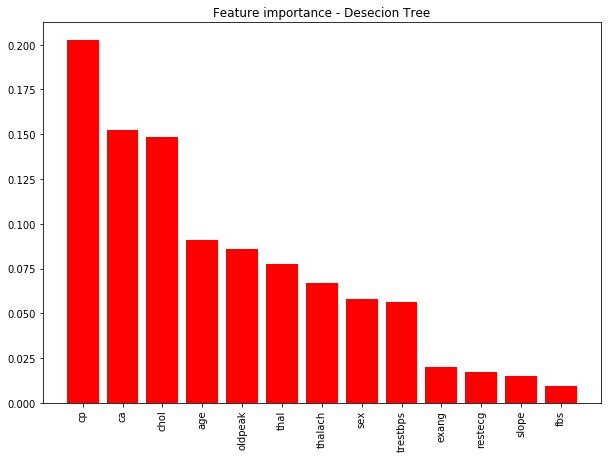

In [60]:
# Example plot
Image(filename='example_part2c.jpg') 

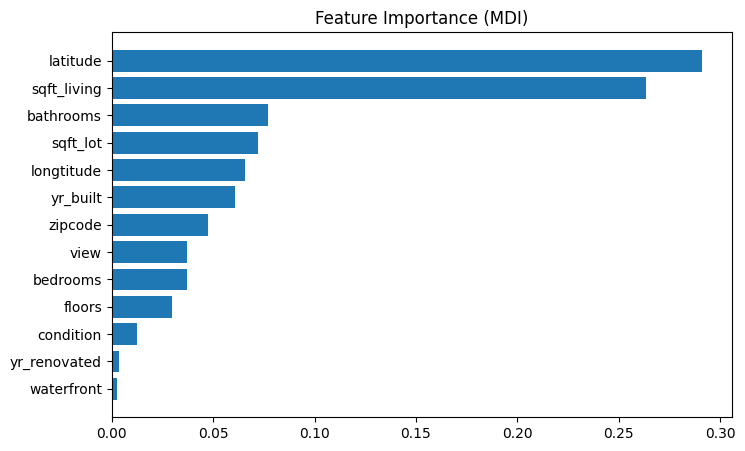

In [61]:
# get the feature importance array from the model object attribute
feature_importance = best_model.feature_importances_

# get the index order to sort the importances
sorted_idx = np.argsort(feature_importance)

# plot
pos = np.arange(sorted_idx.shape[0]) + .5
plt.rcParams["figure.figsize"] = (8,5)
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, np.array(X_bos.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

Question: what are the TOP 5 important features? can you give intuition to why would they be indicative? <br>
TODO Answer: The top 5 important features:

1. latitude - Latitude is a geographic coordinate that indicates the north-south location of a point on Earth's surface, so in our case it's mean have a big difference in the prices between the north side to the south side of the city.
2. sqft_living - make sense that more area of the house is more expensive.
3. bathrooms - Number of bathrooms per bedrooms - Usually there are more bedrooms than bathrooms (at least in the houses I know), the opposite case will indicate a more expensive house.
4. sqft_lot - make sense that more area of the lot is more expensive.
5. longtitude - as I explain at 1, here that indicates the east-west location, so it's mean have a difference in the prices between the east side to the west side of the city.

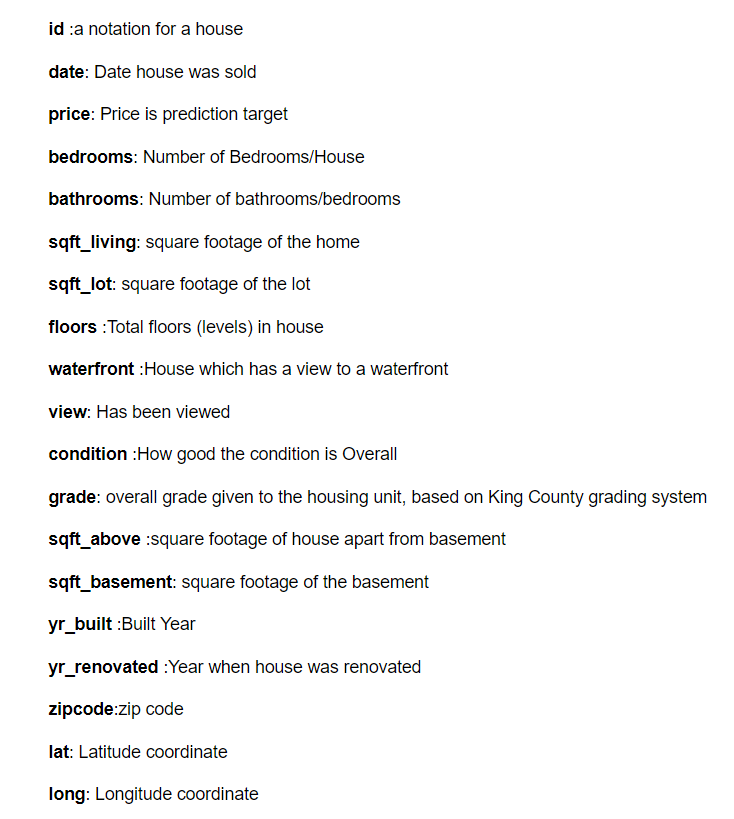

In [62]:
# feature explanations
Image(filename='feature_explanations.png') 